In [1]:
import pandas as pd
df = pd.read_csv('adult.data',na_values=[' ?'])
print(df.head())
print('\nDimensions of data frame:', df.shape)

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [2]:
df.columns = ['age','class','fnlwgt','education','eduNum','marital-status','ocupation','relationship','race','sex','capitalGain','capitalLoss','hours','nativeCountry','income']
df.describe()
df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (30161, 15)


In [3]:
df["class"] = df["class"].astype('category')
df["education"] = df["education"].astype('category')
df["marital-status"] = df["marital-status"].astype('category')
df["ocupation"] = df["ocupation"].astype('category')
df["relationship"] = df["relationship"].astype('category')
df["race"] = df["race"].astype('category')
df["sex"] = df["sex"].astype('category')
df["nativeCountry"] = df["nativeCountry"].astype('category')
df["income"] = df["income"].astype('category')
print(df.dtypes)

age                  int64
class             category
fnlwgt               int64
education         category
eduNum               int64
marital-status    category
ocupation         category
relationship      category
race              category
sex               category
capitalGain          int64
capitalLoss          int64
hours                int64
nativeCountry     category
income            category
dtype: object


In [4]:
print([(race,count/len(df['race'])) for (race,count) in list(zip(df.race.value_counts().index,df.race.value_counts()))])

[(' White', 0.8597858161201551), (' Black', 0.09339875998806406), (' Asian-Pac-Islander', 0.0296740824243228), (' Amer-Indian-Eskimo', 0.009482444216040583), (' Other', 0.007658897251417393)]


In [5]:
print(len(df[((df['race'].eq(' Black')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' Black'))]))

0.1299254526091587


In [6]:
print(len(df[((df['race'].eq(' White')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' White'))]))

0.2637282122474163


In [7]:
print(len(df[((df['race'].eq(' White')) & (df['sex'].eq(' Male')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' White')) & (df['sex'].eq(' Male'))]))

0.32533126351388814


In [8]:
print(len(df[((df['race'].eq(' Black')) & (df['sex'].eq(' Female')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' Black')) & (df['sex'].eq(' Female'))]))

0.06075768406004289


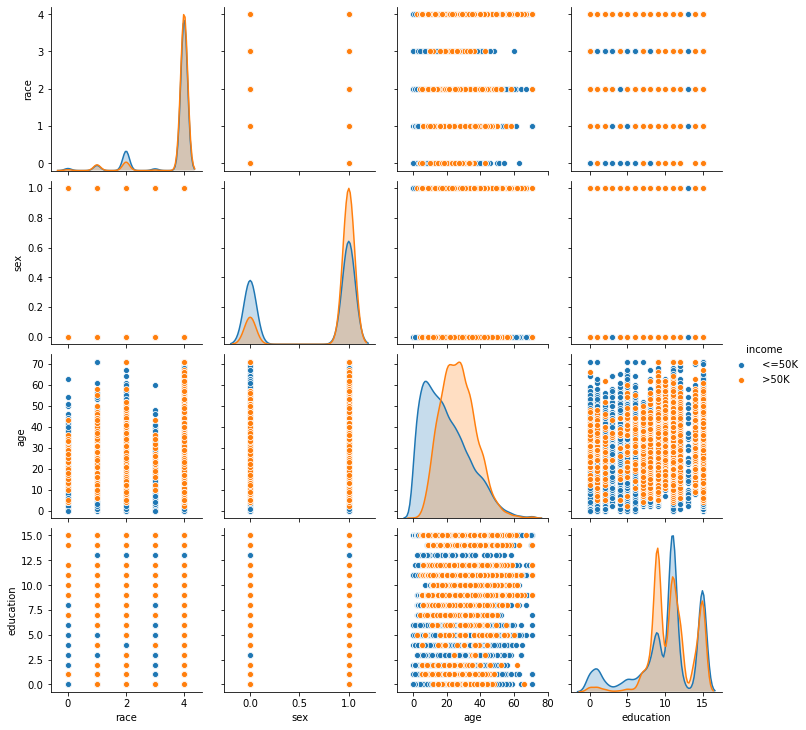

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt
corrDF = df.copy()
corrDF['race'] = corrDF['race'].astype("category").cat.codes
corrDF['sex'] = corrDF['sex'].astype("category").cat.codes
corrDF['age'] = corrDF['age'].astype("category").cat.codes
corrDF['education'] = corrDF['education'].astype("category").cat.codes
g = sb.pairplot(corrDF,vars=['race','sex','age','education'], hue="income")

[Text(0, 0.5, 'People'), Text(0.5, 0, 'Sex')]

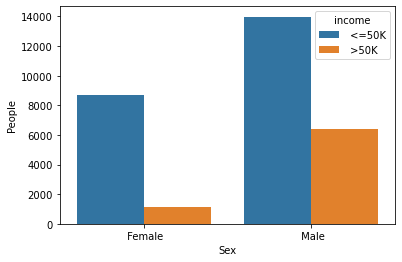

In [10]:
ax = sb.countplot(x='sex', hue="income", data=df)
ax.set(xlabel='Sex', ylabel='People')

[Text(0, 0.5, 'People'), Text(0.5, 0, 'Age')]

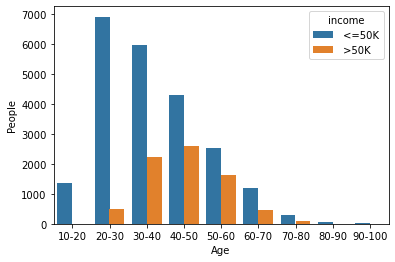

In [11]:
import math
df['ageGroup'] = [str(math.floor(x/10)*10)+"-"+str((math.floor(x/10)*10)+10) for x in df['age'].tolist()]
df["ageGroup"] = df["ageGroup"].astype('category')
ax = sb.countplot(x='ageGroup', hue="income", data=df)
ax.set(xlabel='Age', ylabel='People')

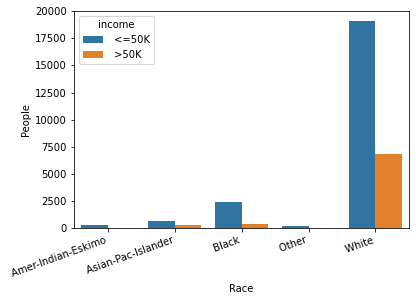

In [12]:
ax = sb.countplot(x='race', hue="income", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set(xlabel='Race', ylabel='People')
plt.show()

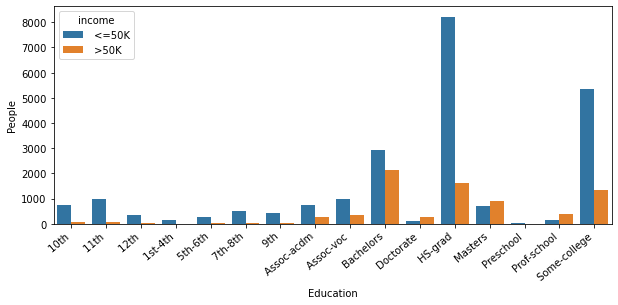

In [13]:
plt.figure(figsize=(10,4))
ax = sb.countplot(x='education', hue="income", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Education', ylabel='People')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
df['race'] = df['race'].astype("category").cat.codes
df['sex'] = df['sex'].astype("category").cat.codes
df['age'] = df['age'].astype("category").cat.codes
df['education'] = df['education'].astype("category").cat.codes
df['relationship'] = df['relationship'].astype("category").cat.codes
X = df.loc[:,['education','age','race','sex','relationship']]
y = df.loc[:,['income']]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=123)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (24128, 5)
test size: (6033, 5)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [
    ('LogReg', LogisticRegression()),
    ('NB', MultinomialNB()),
    ('kNN', KNeighborsClassifier(n_neighbors=5)),
    ('DTree', DecisionTreeClassifier()),
    ('SVM', svm.SVC())
]

clf_acc = {}
clf_precision = {}
clf_recall = {}
clf_f1 = {}

for (clf, model) in models:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    clf_acc[clf] = accuracy_score(y_test, y_pred)
    clf_precision[clf] = precision_score(y_test, y_pred, pos_label=' >50K')
    clf_recall[clf] = recall_score(y_test, y_pred, pos_label=' >50K')
    clf_f1[clf] = f1_score(y_test, y_pred, pos_label=' >50K')
    
for clf in clf_precision:
    print(clf, '\t', clf_acc[clf])

LogReg 	 0.7518647439085032
NB 	 0.7107575004143876
kNN 	 0.8007624730648102
DTree 	 0.8143543842201226
SVM 	 0.7561743742748218


c:\users\evans\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#from sklearn.metrics import classification_report

#print(classification_report(y_test, pred))